In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [2]:
# Mengimpor Kumpulan Data
from zipfile import ZipFile

data_path = 'dataset_cat_dog.zip'

with ZipFile(data_path, 'r') as zip:
	zip.extractall()
	print('The data set has been extracted.')

The data set has been extracted.


In [3]:
# Visualisasi data
data_path = 'dataset_cat_dog.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The dataset has been extracted.')

path = 'dataset_cat_dog'  # Ubah path menjadi direktori yang telah diekstrak
classes = os.listdir(path)
classes

The dataset has been extracted.


['cats', 'dogs']

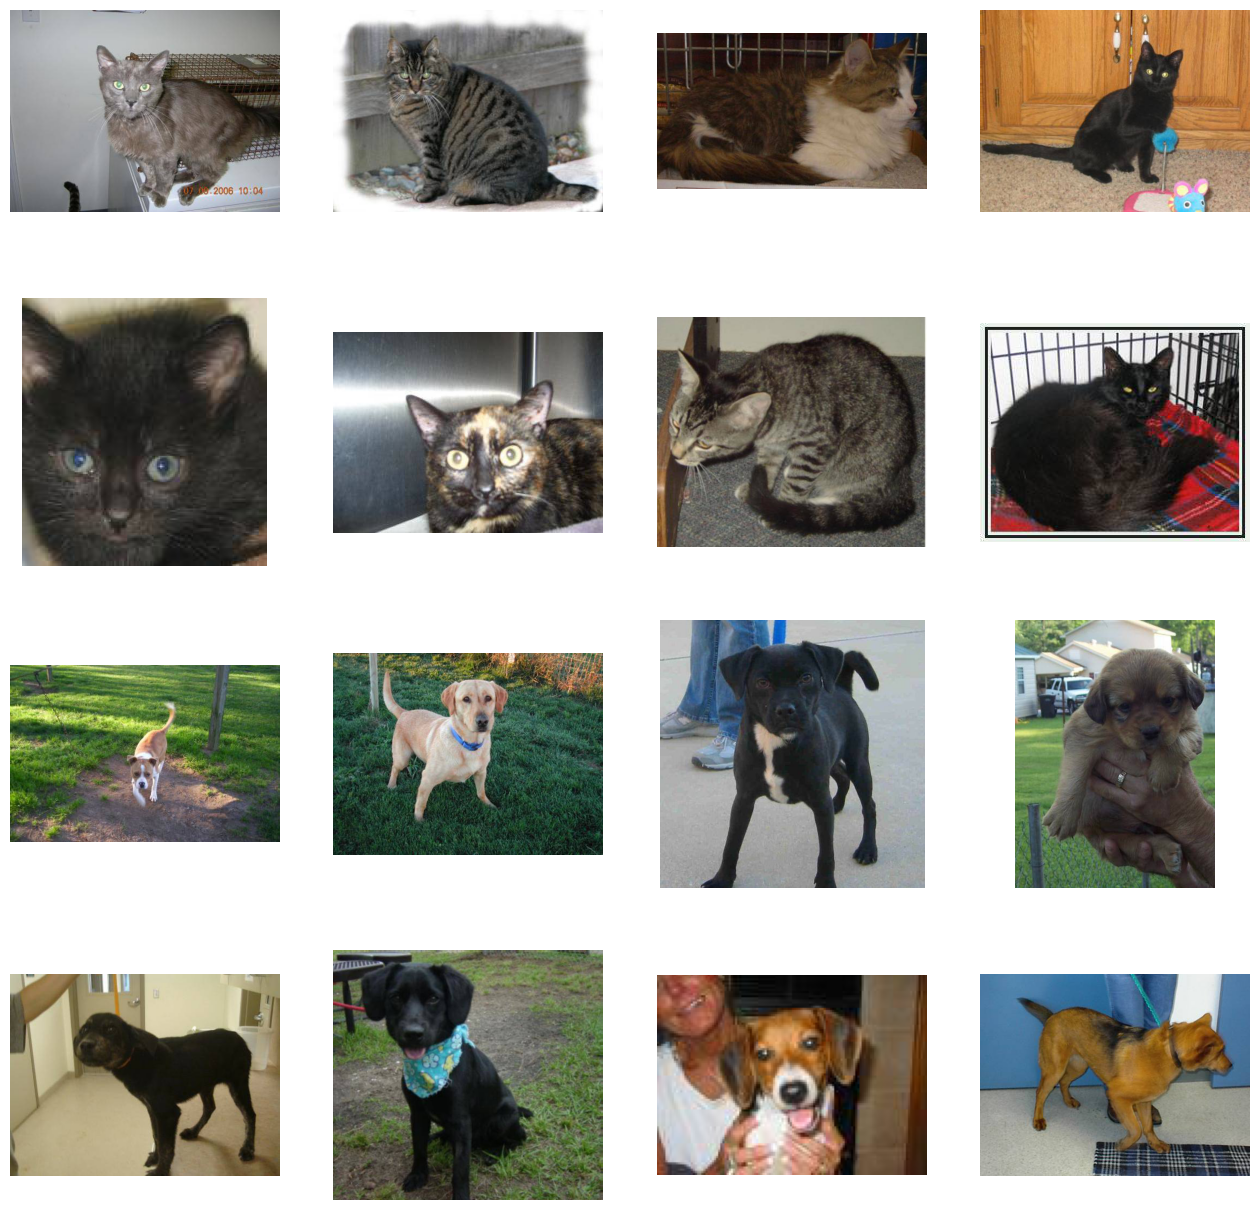

In [4]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('dataset_cat_dog', 'cats')
dog_dir = os.path.join('dataset_cat_dog', 'dogs')

cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()

In [9]:
# Persiapan Data untuk Pelatihan
base_dir = 'dataset_cat_dog'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)

Found 838 files belonging to 2 classes.
Using 755 files for training.
Found 838 files belonging to 2 classes.
Using 83 files for validation.


In [11]:
# Model Arsitektur
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])


In [12]:
# Mencetak ringkasan arsitektur mode
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 64)      

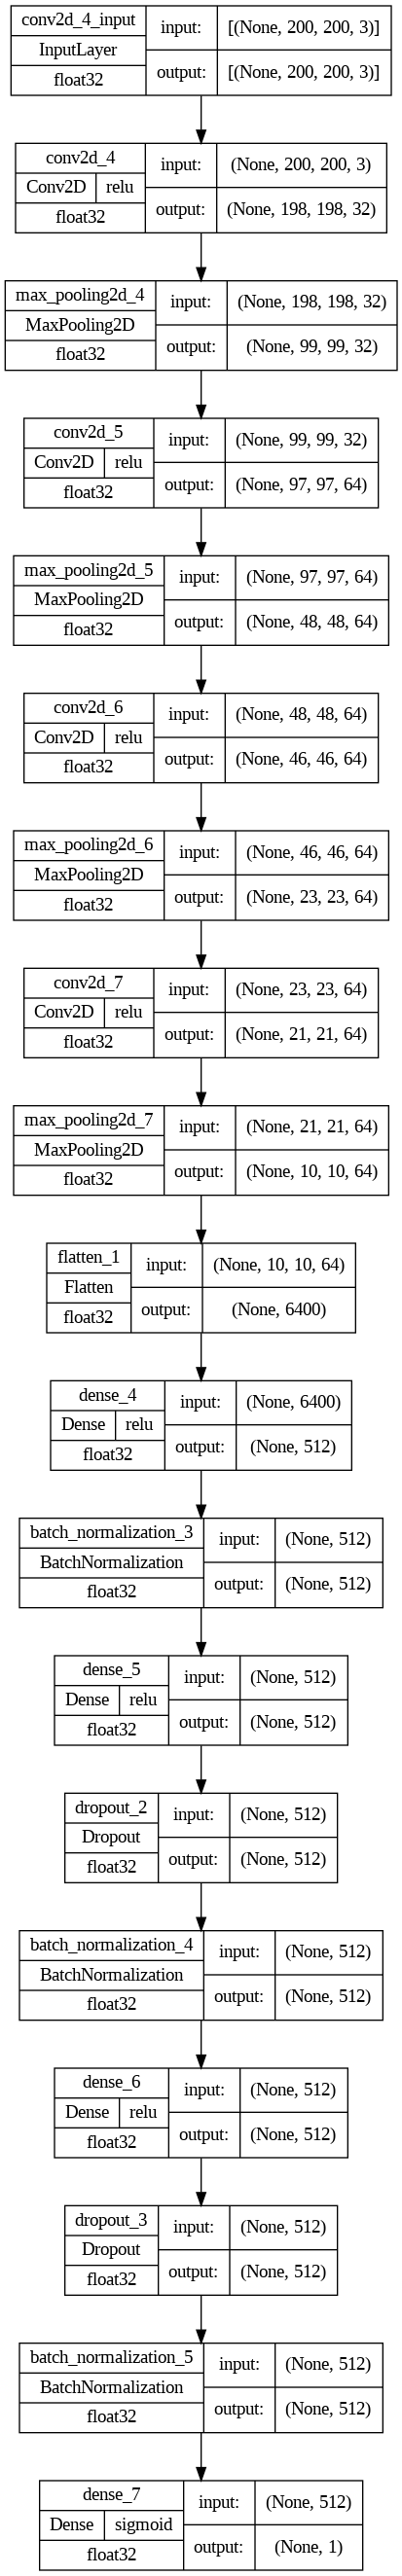

In [14]:
# Plot mode
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [15]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)

In [16]:
# Pelatihan Model
history = model.fit(train_datagen,
		epochs=10,
		validation_data=test_datagen)

Epoch 1/10
24/24 [==============================] - 66s 3s/step - loss: 0.8944 - accuracy: 0.5775 - val_loss: 1.7690 - val_accuracy: 0.6988
Epoch 2/10
24/24 [==============================] - 63s 3s/step - loss: 0.7490 - accuracy: 0.6344 - val_loss: 1.8477 - val_accuracy: 0.3253
Epoch 3/10
24/24 [==============================] - 63s 3s/step - loss: 0.6435 - accuracy: 0.6781 - val_loss: 1.6432 - val_accuracy: 0.6867
Epoch 4/10
24/24 [==============================] - 62s 3s/step - loss: 0.5747 - accuracy: 0.7258 - val_loss: 1.2678 - val_accuracy: 0.4458
Epoch 5/10
24/24 [==============================] - 63s 3s/step - loss: 0.5296 - accuracy: 0.7470 - val_loss: 0.7837 - val_accuracy: 0.7349
Epoch 6/10
24/24 [==============================] - 61s 3s/step - loss: 0.4706 - accuracy: 0.7775 - val_loss: 0.9324 - val_accuracy: 0.5060
Epoch 7/10
24/24 [==============================] - 61s 3s/step - loss: 0.3758 - accuracy: 0.8477 - val_loss: 0.7204 - val_accuracy: 0.7349
Epoch 8/10
24/24 [==

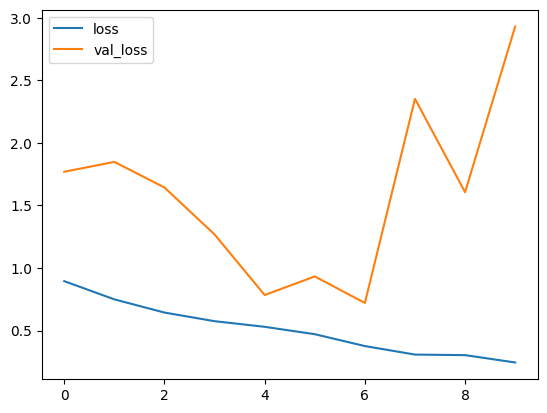

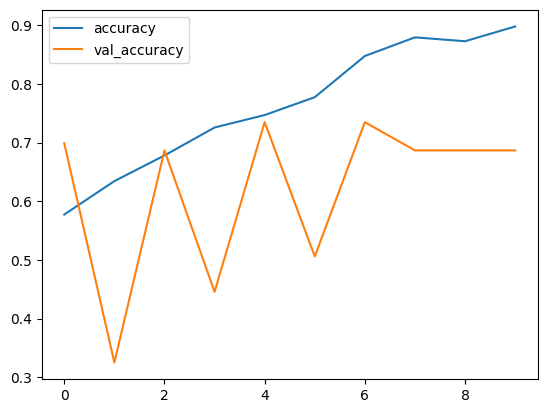

In [24]:
# Evaluasi Model
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 [==============================] - 0s 41ms/step
Cat


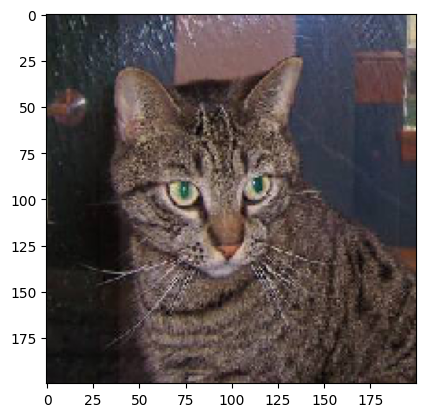

In [30]:
# Pengujian dan Prediksi Model
from tensorflow.keras.preprocessing import image

# Input image
test_image = image.load_img('cat.1.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)

# Mapping result array with the main name list
if result >= 0.5:
    print("Dog")
else:
    print("Cat")

1/1 [==============================] - 0s 41ms/step
Cat


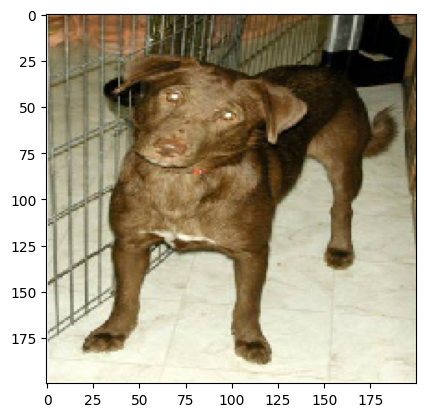

In [31]:
test_image = image.load_img('dog.1.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
	print("Dog")
else:
	print("Cat")